In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import time
from scipy.misc import imread

In [130]:
# ------------------------------------ Cleanup CSV files --------------------------------------------------------

# Get sources of raw data for cleanup
species_filename1 = "../Data/Clean/Monarch/Monarch_clean.csv"
species_filename2 = "../Data/Clean/Whale/Blue_Whale.csv"
species_filename3 = "../Data/Clean/Whale/Humpback_whale.csv"
species_filename4 = "../Data/Clean/Tern/Arctic Tern.csv"

# Reading csv files
df_monarch = pd.read_csv(species_filename1)
#df_blue_whale = pd.read_csv(species_filename2)
#df_humpback_whale = pd.read_csv(species_filename3)
df_arctic_tern = pd.read_csv(species_filename4)

In [ ]:
#df_blue_whale.head()

In [ ]:
#df_humpback_whale.head()

In [131]:
df_arctic_tern = df_arctic_tern.drop(columns=['geom','datasets','num_species','csquare','geom_wkt'])
#df_arctic_tern.head()

In [4]:
arctic_adj = df_arctic_tern.dropna(subset = ['latitude','longitude','date_min'])
arctic_adj['year'] = pd.DatetimeIndex(arctic_adj['date_min']).year
arctic_adj['month']= pd.DatetimeIndex(arctic_adj['date_min']).month

In [124]:
# Preparing data from Jan-Dec
arctic_2014 = arctic_adj.loc[arctic_adj['year'] == 2014]
arctic_2011 = arctic_adj.loc[arctic_adj['year'] == 2011]
arctic_2009 = arctic_adj.loc[arctic_adj['year'] == 2009]
arctic_2008 = arctic_adj.loc[arctic_adj['year'] == 2008]
arctic_2007 = arctic_adj.loc[arctic_adj['year'] == 2007]

arctic_1995 = arctic_adj.loc[arctic_adj['year'] == 1995]
arctic_1992 = arctic_adj.loc[arctic_adj['year'] == 1992]
arctic_1991 = arctic_adj.loc[arctic_adj['year'] == 1991]

arctic_1985 = arctic_adj.loc[arctic_adj['year'] == 1985]
arctic_1984 = arctic_adj.loc[arctic_adj['year'] == 1984]
arctic_1981 = arctic_adj.loc[arctic_adj['year'] == 1981]
arctic_1980 = arctic_adj.loc[arctic_adj['year'] == 1980]

In [125]:
arctic_mean_2014 = arctic_2014.groupby(['month']).mean()
arctic_mean_2014.reset_index(drop=False,inplace=True)
arctic_std_2014 = arctic_2014.groupby(["year","month"])["latitude"].sem()

arctic_mean_2011 = arctic_2011.groupby(['month']).mean()
arctic_mean_2011.reset_index(drop=False,inplace=True)
arctic_std_2011 = arctic_2011.groupby(["year","month"])["latitude"].sem()

arctic_mean_2009 = arctic_2009.groupby(['month']).mean()
arctic_mean_2009.reset_index(drop=False,inplace=True)
arctic_std_2009 = arctic_2009.groupby(["year","month"])["latitude"].sem()


arctic_mean_2008 = arctic_2008.groupby(['month']).mean()
arctic_mean_2008.reset_index(drop=False,inplace=True)
arctic_std_2008 = arctic_2008.groupby(["year","month"])["latitude"].sem()

arctic_mean_2007 = arctic_2007.groupby(['month']).mean()
arctic_mean_2007.reset_index(drop=False,inplace=True)
arctic_std_2007 = arctic_2007.groupby(["year","month"])["latitude"].sem()

arctic_mean_1995 = arctic_1995.groupby(['month']).mean()
arctic_mean_1995.reset_index(drop=False,inplace=True)
arctic_std_1995 = arctic_1995.groupby(["year","month"])["latitude"].sem()

arctic_mean_1991 = arctic_1991.groupby(['month']).mean()
arctic_mean_1991.reset_index(drop=False,inplace=True)
arctic_std_1991 = arctic_1991.groupby(["year","month"])["latitude"].sem()

arctic_mean_1985 = arctic_1985.groupby(['month']).mean()
arctic_mean_1985.reset_index(drop=False,inplace=True)
arctic_std_1985 = arctic_1985.groupby(["year","month"])["latitude"].sem()

arctic_mean_1984 = arctic_1984.groupby(['month']).mean()
arctic_mean_1984.reset_index(drop=False,inplace=True)
arctic_std_1984 = arctic_1984.groupby(["year","month"])["latitude"].sem()

arctic_mean_1981 = arctic_1981.groupby(['month']).mean()
arctic_mean_1981.reset_index(drop=False,inplace=True)
arctic_std_1981 = arctic_1981.groupby(["year","month"])["latitude"].sem()

arctic_mean_1980 = arctic_1980.groupby(['month']).mean()
arctic_mean_1980.reset_index(drop=False,inplace=True)
arctic_std_1980 = arctic_1980.groupby(["year","month"])["latitude"].sem()

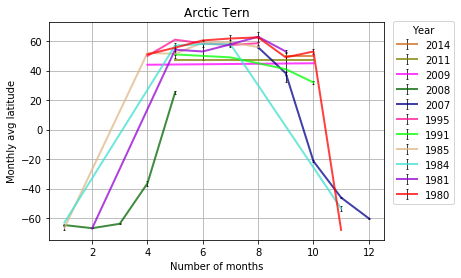

In [126]:
plt.errorbar(arctic_mean_2014.month,arctic_mean_2014.latitude,yerr=arctic_std_2014,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'chocolate',linewidth=2.0,label = "2014")
plt.errorbar(arctic_mean_2011.month,arctic_mean_2011.latitude,yerr=arctic_std_2011,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'olive',linewidth=2.0,label = "2011")
plt.errorbar(arctic_mean_2009.month,arctic_mean_2009.latitude,yerr=arctic_std_2009,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'fuchsia',linewidth=2.0,label = "2009")
plt.errorbar(arctic_mean_2008.month,arctic_mean_2008.latitude,yerr=arctic_std_2008,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'darkgreen',linewidth=2.0,label = "2008")
plt.errorbar(arctic_mean_2007.month,arctic_mean_2007.latitude,yerr=arctic_std_2007,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'darkblue',linewidth=2.0,label = "2007")
plt.errorbar(arctic_mean_1995.month,arctic_mean_1995.latitude,yerr=arctic_std_1995,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'deeppink',linewidth=2.0,label = "1995")
plt.errorbar(arctic_mean_1991.month,arctic_mean_1991.latitude,yerr=arctic_std_1991,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'lime',linewidth=2.0,label = "1991")
plt.errorbar(arctic_mean_1985.month,arctic_mean_1985.latitude,yerr=arctic_std_1985,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'burlywood',linewidth=2.0,label = "1985")
plt.errorbar(arctic_mean_1984.month,arctic_mean_1984.latitude,yerr=arctic_std_1984,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'turquoise',linewidth=2.0,label = "1984")
plt.errorbar(arctic_mean_1981.month,arctic_mean_1981.latitude,yerr=arctic_std_1981,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'darkviolet',linewidth=2.0,label = "1981")
plt.errorbar(arctic_mean_1980.month,arctic_mean_1980.latitude,yerr=arctic_std_1980,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'red',linewidth=2.0,label = "1980")

plt.xlabel("Number of months")
plt.ylabel("Monthly avg latitude")
plt.title("Arctic Tern")
plt.grid()
plt.legend(title="Year",loc='upper right', bbox_to_anchor=(1.225, 1.03))
plt.show()

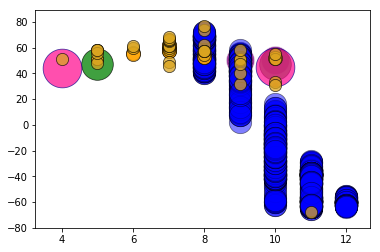

In [43]:
plt.scatter(arctic_2014.month,arctic_2014.latitude,s=800,alpha = 0.75,color = 'purple',edgecolor = 'whitesmoke',linewidth=0.75)
plt.scatter(arctic_2011.month,arctic_2011.latitude,s=1000,alpha = 0.75,color = 'green',edgecolor = 'black',linewidth=0.75)
plt.scatter(arctic_2009.month,arctic_2009.latitude,s=1500,alpha = 0.75,color = 'deeppink',edgecolor = 'darkblue',linewidth=0.75)
plt.scatter(arctic_2007.month,arctic_2007.latitude,s=500, alpha = 0.5,color = 'blue',edgecolor = 'black',linewidth=0.75)
plt.scatter(arctic_2003.month,arctic_2003.latitude,s=50 ,alpha = 0.4,color = 'red',edgecolor = 'whitesmoke',linewidth=0.75)
plt.scatter(arctic_1994.month,arctic_1994.latitude,s=200,alpha = 0.75,color = 'orange',edgecolor = 'black',linewidth=0.75)
plt.scatter(arctic_1991.month,arctic_1991.latitude,s=150,alpha = 0.75,color = 'goldenrod',edgecolor = 'black',linewidth=0.75)
plt.scatter(arctic_1980.month,arctic_1980.latitude,s=150,alpha = 0.75,color = 'goldenrod',edgecolor = 'black',linewidth=0.75)

In [ ]:
df_monarch.head()

In [ ]:
monarch_adj = df_monarch.dropna(subset = ['latitude','longitude','observed_on'])
monarch_adj['year'] = pd.DatetimeIndex(monarch_adj['observed_on']).year
monarch_adj['month']= pd.DatetimeIndex(monarch_adj['observed_on']).month
monarch_2014 = monarch_adj.loc[monarch_adj['year'] == 2014]
monarch_2015 = monarch_adj.loc[monarch_adj['year'] == 2015]
monarch_2016 = monarch_adj.loc[monarch_adj['year'] == 2016]
monarch_2017 = monarch_adj.loc[monarch_adj['year'] == 2017]
monarch_2018 = monarch_adj.loc[monarch_adj['year'] == 2018]

monarch_2014.count()


In [ ]:
stderr_lon_2017=monarch_2017.longitude.sem(axis=0)
stderr_lat_2017=monarch_2017.latitude.sem(axis=0)
stderr_lon_2018=monarch_2017.longitude.sem(axis=0)
stderr_lon_2018=monarch_2017.latitude.sem(axis=0)

In [ ]:
plt.scatter(monarch_2014.month,monarch_2014.latitude,s=300,alpha = 0.75,color = 'purple',edgecolor = 'black',linewidth=0.75)
plt.scatter(monarch_2015.month,monarch_2015.latitude,s=300,alpha = 0.75,color = 'green',edgecolor = 'black',linewidth=0.75)
plt.scatter(monarch_2016.month,monarch_2016.latitude,s=200,alpha = 0.75,color = 'yellow',edgecolor = 'black',linewidth=0.75)
plt.scatter(monarch_2017.month,monarch_2017.latitude,s=150, alpha = 0.5,color = 'blue',edgecolor = 'black',linewidth=0.75)
plt.scatter(monarch_2018.month,monarch_2018.latitude,s=50 ,alpha = 0.4,color = 'red',edgecolor = 'black',linewidth=0.75)

plt.show()

In [ ]:
plt.scatter(monarch_2017.longitude,monarch_2017.month,s=150, alpha = 0.5,color = 'blue',edgecolor = 'black',linewidth=0.75)
plt.scatter(monarch_2018.longitude,monarch_2018.month,s=50 ,alpha = 0.4,color = 'red',edgecolor = 'black',linewidth=0.75)


In [ ]:
plt.scatter(monarch_2017.latitude,monarch_2017.longitude,s=50, alpha = 0.5,color = 'blue',edgecolor = 'black',linewidth=0.75)
plt.scatter(monarch_2018.latitude,monarch_2018.longitude,s=50 ,alpha = 0.4,color = 'red',edgecolor = 'black',linewidth=0.75)
plt.scatter(monarch_2018.latitude,monarch_2018.longitude,s=50 ,alpha = 0.4,color = 'red',edgecolor = 'black',linewidth=0.75)


In [ ]:
ind = np.arange(monarch_adj.month)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
lon1 = plt.bar(ind, monarch_2017.longitude, width, yerr=stderr_lon_2017)
lon2 = plt.bar(ind, monarch_2018.longitude, width,
             bottom=monarch_2018.longitude, yerr=stderr_lon_2018)

plt.ylabel('Count')
plt.xticks(ind, ('4', '5', '6', '7', '8', '9', '10', '11', '12'))
plt.yticks(np.arange(0, 200, 10))

plt.show()